# HBV hydrological model forced with ERA5 forcing data
In this notebook we will generate forcing data for the HBV hydrological model from the output of a CMIP6 climate model using the eWaterCycle platform. Here we generate forcing data for different future climate scenarios. 

The code in this notebook is nearly identical to the code in [this notebook](step_1a_generate_historical_forcing.ipynb) where we generated both ERA5 and historical CMIP6 forcing data. For detailed descriptions, see that notebook.

In [1]:
# General python
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import json
from esmvalcore.config import CFG

# Niceties
from rich import print

In [2]:
# General eWaterCycle
import ewatercycle
import ewatercycle.forcing

In [3]:
# Parameters
region_id = None
settings_path = "settings.json"

In [4]:
# Parameters
region_id = "camelsgb_77003"
settings_path = "regions/camelsgb_77003/settings.json"


In [5]:
# Load settings
# Read from the JSON file
with open(settings_path, "r") as json_file:
    settings = json.load(json_file)

In [6]:
display(settings)

{'caravan_id': 'camelsgb_77003',
 'calibration_start_date': '1994-08-01T00:00:00Z',
 'calibration_end_date': '2004-07-31T00:00:00Z',
 'validation_start_date': '2004-08-01T00:00:00Z',
 'validation_end_date': '2014-07-31T00:00:00Z',
 'future_start_date': '2029-08-01T00:00:00Z',
 'future_end_date': '2049-08-31T00:00:00Z',
 'CMIP_info': {'dataset': ['MPI-ESM1-2-HR'],
  'ensembles': ['r1i1p1f1'],
  'experiments': ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585'],
  'project': 'CMIP6',
  'frequency': 'day',
  'grid': 'gn',
  'variables': ['pr', 'tas', 'rsds']},
 'base_path': '/gpfs/scratch1/shared/mmelotto/ewatercycleClimateImpact/HBV',
 'path_caravan': '/gpfs/scratch1/shared/mmelotto/ewatercycleClimateImpact/HBV/forcing_data/camelsgb_77003/caravan',
 'path_ERA5': '/gpfs/scratch1/shared/mmelotto/ewatercycleClimateImpact/HBV/forcing_data/camelsgb_77003/ERA5',
 'path_CMIP6': '/gpfs/scratch1/shared/mmelotto/ewatercycleClimateImpact/HBV/forcing_data/camelsgb_77003/CMIP6',
 'path_output': '/

## CMIP future forcing
We loop over the different datasets, experiments and ensembles, but we skip the first experiment, which is the 'historical' one, this was already done in [this notebook](step_1a_generate_historical_forcing.ipynb).

In [7]:
# Setting for ESMValTool to make sure the online esgf resources are always used and
# we don't rely on locally cached information.
# CFG['search_esgf'] = 'when_missing'
CFG['search_esgf'] = 'always'
CFG['rootpath'] = {'CMIP6': [Path(settings['path_CMIP6'])], 'default': [Path(settings['path_output'])]}
CFG['download_dir'] = settings['downloads']
display(CFG)

Config({'auxiliary_data_dir': PosixPath('/home/mmelotto/auxiliary_data'),
        'check_level': <CheckLevels.DEFAULT: 3>,
        'compress_netcdf': False,
        'config_developer_file': PosixPath('/home/mmelotto/.conda/envs/ewatercycle_snellius/lib/python3.12/site-packages/esmvalcore/config-developer.yml'),
        'config_file': PosixPath('/home/mmelotto/.conda/envs/ewatercycle_snellius/lib/python3.12/site-packages/esmvalcore/config-user.yml'),
        'diagnostics': None,
        'download_dir': PosixPath('/gpfs/scratch1/shared/mmelotto/ewatercycleClimateImpact/HBV/downloads/camelsgb_77003'),
        'drs': {'CMIP3': 'ESGF',
                'CMIP5': 'ESGF',
                'CMIP6': 'ESGF',
                'CORDEX': 'ESGF',
                'obs4MIPs': 'ESGF'},
        'exit_on_warning': False,
        'extra_facets_dir': (),
        'log_level': 'info',
        'max_datasets': None,
        'max_parallel_tasks': None,
        'max_years': None,
        'output_dir': PosixPath('/ho

MPI-ESM1-2-HR

ssp126

r1i1p1f1

LumpedMakkinkForcing(
    start_time='2029-08-01T00:00:00Z',
    end_time='2049-08-31T00:00:00Z',
    directory=PosixPath('/gpfs/scratch1/shared/mmelotto/ewatercycleClimateImpact/HBV/forcing_data/camelsgb_77003/CM
IP6/MPI-ESM1-2-HR/ssp126/r1i1p1f1/work/diagnostic/script'),
    shape=PosixPath('/gpfs/scratch1/shared/mmelotto/ewatercycleClimateImpact/HBV/forcing_data/camelsgb_77003/CMIP6/
MPI-ESM1-2-HR/ssp126/r1i1p1f1/work/diagnostic/script/camelsgb_77003.shp'),
    filenames={
        'pr': 'CMIP6_MPI-ESM1-2-HR_day_ssp126_r1i1p1f1_pr_gn_2029-2049.nc',
        'tas': 'CMIP6_MPI-ESM1-2-HR_day_ssp126_r1i1p1f1_tas_gn_2029-2049.nc',
        'rsds': 'CMIP6_MPI-ESM1-2-HR_day_ssp126_r1i1p1f1_rsds_gn_2029-2049.nc',
        'evspsblpot': 'Derived_Makkink_evspsblpot.nc'
    }
)

/scratch-local/mmelotto.17145362/ipykernel_2510035/484115776.py:38: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
/scratch-local/mmelotto.17145362/ipykernel_2510035/484115776.py:38: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.


ssp245

r1i1p1f1

LumpedMakkinkForcing(
    start_time='2029-08-01T00:00:00Z',
    end_time='2049-08-31T00:00:00Z',
    directory=PosixPath('/gpfs/scratch1/shared/mmelotto/ewatercycleClimateImpact/HBV/forcing_data/camelsgb_77003/CM
IP6/MPI-ESM1-2-HR/ssp245/r1i1p1f1/work/diagnostic/script'),
    shape=PosixPath('/gpfs/scratch1/shared/mmelotto/ewatercycleClimateImpact/HBV/forcing_data/camelsgb_77003/CMIP6/
MPI-ESM1-2-HR/ssp245/r1i1p1f1/work/diagnostic/script/camelsgb_77003.shp'),
    filenames={
        'pr': 'CMIP6_MPI-ESM1-2-HR_day_ssp245_r1i1p1f1_pr_gn_2029-2049.nc',
        'tas': 'CMIP6_MPI-ESM1-2-HR_day_ssp245_r1i1p1f1_tas_gn_2029-2049.nc',
        'rsds': 'CMIP6_MPI-ESM1-2-HR_day_ssp245_r1i1p1f1_rsds_gn_2029-2049.nc',
        'evspsblpot': 'Derived_Makkink_evspsblpot.nc'
    }
)

/scratch-local/mmelotto.17145362/ipykernel_2510035/484115776.py:38: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
/scratch-local/mmelotto.17145362/ipykernel_2510035/484115776.py:38: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.


ssp370

r1i1p1f1

LumpedMakkinkForcing(
    start_time='2029-08-01T00:00:00Z',
    end_time='2049-08-31T00:00:00Z',
    directory=PosixPath('/gpfs/scratch1/shared/mmelotto/ewatercycleClimateImpact/HBV/forcing_data/camelsgb_77003/CM
IP6/MPI-ESM1-2-HR/ssp370/r1i1p1f1/work/diagnostic/script'),
    shape=PosixPath('/gpfs/scratch1/shared/mmelotto/ewatercycleClimateImpact/HBV/forcing_data/camelsgb_77003/CMIP6/
MPI-ESM1-2-HR/ssp370/r1i1p1f1/work/diagnostic/script/camelsgb_77003.shp'),
    filenames={
        'pr': 'CMIP6_MPI-ESM1-2-HR_day_ssp370_r1i1p1f1_pr_gn_2029-2049.nc',
        'tas': 'CMIP6_MPI-ESM1-2-HR_day_ssp370_r1i1p1f1_tas_gn_2029-2049.nc',
        'rsds': 'CMIP6_MPI-ESM1-2-HR_day_ssp370_r1i1p1f1_rsds_gn_2029-2049.nc',
        'evspsblpot': 'Derived_Makkink_evspsblpot.nc'
    }
)

/scratch-local/mmelotto.17145362/ipykernel_2510035/484115776.py:38: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
/scratch-local/mmelotto.17145362/ipykernel_2510035/484115776.py:38: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.


ssp585

r1i1p1f1

LumpedMakkinkForcing(
    start_time='2029-08-01T00:00:00Z',
    end_time='2049-08-31T00:00:00Z',
    directory=PosixPath('/gpfs/scratch1/shared/mmelotto/ewatercycleClimateImpact/HBV/forcing_data/camelsgb_77003/CM
IP6/MPI-ESM1-2-HR/ssp585/r1i1p1f1/work/diagnostic/script'),
    shape=PosixPath('/gpfs/scratch1/shared/mmelotto/ewatercycleClimateImpact/HBV/forcing_data/camelsgb_77003/CMIP6/
MPI-ESM1-2-HR/ssp585/r1i1p1f1/work/diagnostic/script/camelsgb_77003.shp'),
    filenames={
        'pr': 'CMIP6_MPI-ESM1-2-HR_day_ssp585_r1i1p1f1_pr_gn_2029-2049.nc',
        'tas': 'CMIP6_MPI-ESM1-2-HR_day_ssp585_r1i1p1f1_tas_gn_2029-2049.nc',
        'rsds': 'CMIP6_MPI-ESM1-2-HR_day_ssp585_r1i1p1f1_rsds_gn_2029-2049.nc',
        'evspsblpot': 'Derived_Makkink_evspsblpot.nc'
    }
)

/scratch-local/mmelotto.17145362/ipykernel_2510035/484115776.py:38: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
/scratch-local/mmelotto.17145362/ipykernel_2510035/484115776.py:38: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.


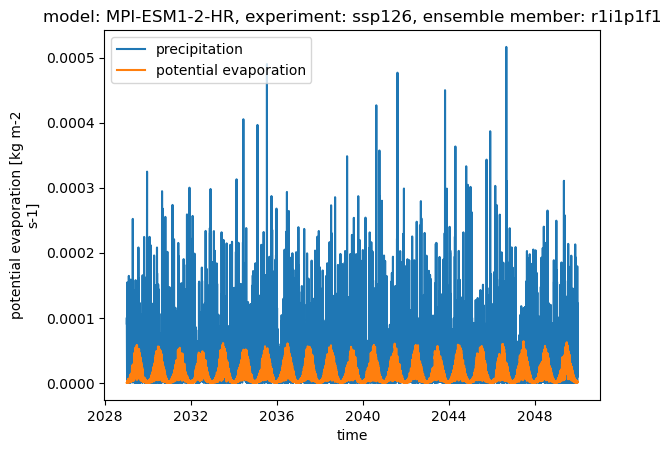

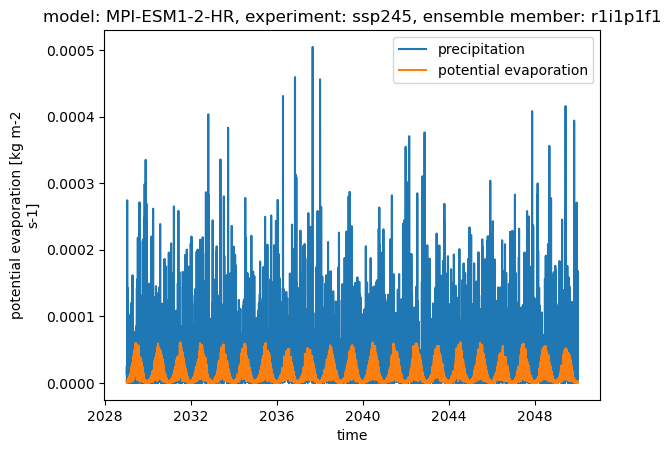

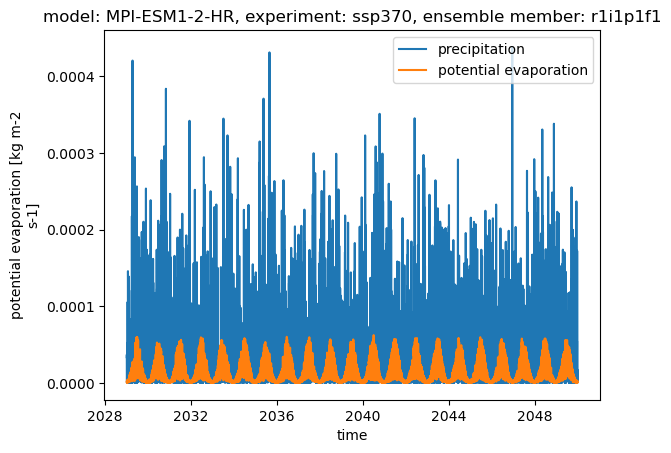

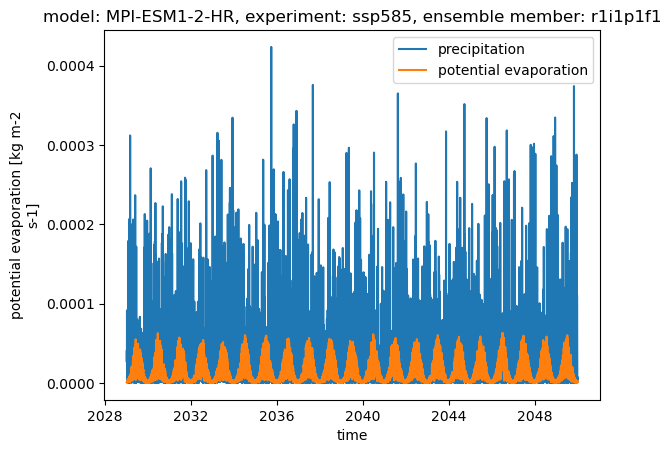

In [8]:
for dataset_name in settings['CMIP_info']['dataset']: 
    # We are asuming one dataset, but this loop allows for multiple
    print(dataset_name)
    
    for experiment_name in settings['CMIP_info']['experiments'][1:]: # skipping historical
        print(experiment_name)
    
        for ensemble_name in settings['CMIP_info']['ensembles']:
            print(ensemble_name)

            cmip_dataset = {
                "dataset": dataset_name,
                "project": settings['CMIP_info']['project'],
                "grid": "gn",
                "exp": experiment_name,
                "ensemble": ensemble_name,
            }
        
            # Create a subfolder for this specific combination of dataset, experiment and ensemblemember
            path_CMIP6 = Path(settings['path_CMIP6']) / cmip_dataset["dataset"] / cmip_dataset["exp"] / cmip_dataset["ensemble"]
            path_CMIP6.mkdir(exist_ok=True, parents=True)

            try:
                load_location = path_CMIP6 / "work" / "diagnostic" / "script" 
                CMIP_forcing_object = ewatercycle.forcing.sources["LumpedMakkinkForcing"].load(directory=load_location)
            except:
                CMIP_forcing_object = ewatercycle.forcing.sources["LumpedMakkinkForcing"].generate(
                   dataset=cmip_dataset,
                   start_time=settings['future_start_date'],
                   end_time=settings['future_end_date'],
                   directory=path_CMIP6,
                   shape=settings['path_shape'],
                )
            print(CMIP_forcing_object)

            # Quick plot of the precipitation and potential evaporation data
            plt.figure()
            ds_CMIP = xr.open_mfdataset([CMIP_forcing_object['pr'],CMIP_forcing_object['evspsblpot']])
            ds_CMIP["pr"].plot(label = 'precipitation')
            ds_CMIP["evspsblpot"].plot(label = 'potential evaporation')
            plt.legend()
            plt.title('model: ' + dataset_name + ', experiment: ' + experiment_name + 
                      ', ensemble member: ' + ensemble_name) 